# Market Basket Analysis using Apriori Algorithm

### Importing Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

### Reading the Dataset

In [32]:
df = pd.read_csv(r"C:\Users\Sanjana\ML\Apriori_project\Groceries_dataset.csv")

In [33]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


### Data Exploration

In [34]:
data = df['itemDescription'].value_counts().sort_values(ascending=False)[:10]

In [35]:
data

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

<Axes: xlabel='itemDescription'>

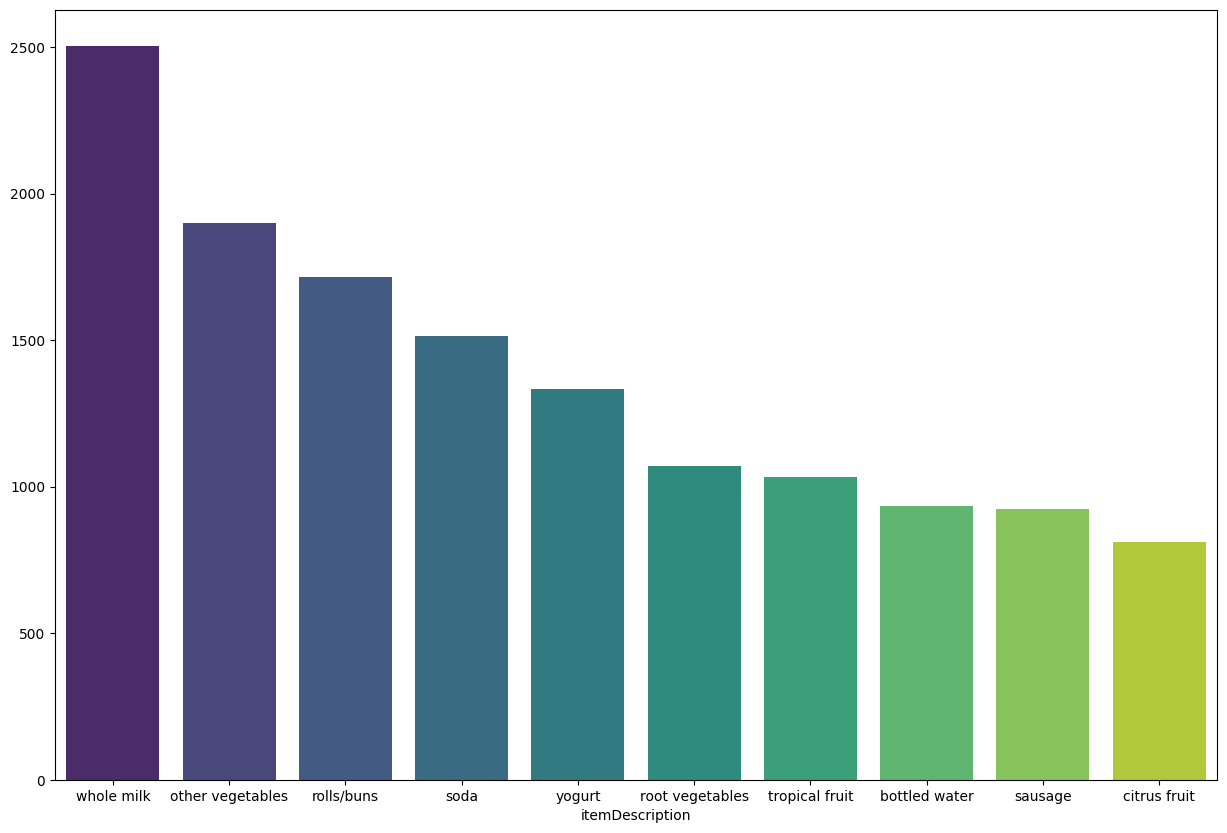

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x=data.index,y=data.values, palette="viridis")

In [37]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [38]:
df['Quantity'] = 1

In [39]:
df

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [40]:
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [41]:
# df.groupby(['Member_number','itemDescription'])['Quantity'].sum()
# This structure cannot directly be used for Apriori. unstack() converts itemDescription into columns.

In [42]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
transactions = transactions.fillna(0)

In [44]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
def encode(df):
    return 1 if df > 0 else 0

basket = transactions.applymap(encode)

In [46]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from mlxtend.frequent_patterns import apriori

In [48]:
from mlxtend.frequent_patterns import association_rules

In [49]:
frequent_itemset = apriori(basket,min_support=0.06,use_colnames=True)

In [50]:
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [51]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,1.0,0.007582,1.026461,0.184748,0.141705,0.025778,0.288950


In [52]:
rules[(rules['confidence']>0.4) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
9,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,1.0,0.013414,1.111969,0.181695,0.189147,0.100694,0.344347
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,1.0,0.008239,1.136661,0.142501,0.127660,0.120231,0.333892
22,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,1.0,0.004994,1.050962,0.089008,0.141622,0.048491,0.292653
24,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,1.0,0.008931,1.090663,0.160404,0.148827,0.083127,0.297241
26,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,1.0,0.011526,1.147795,0.158299,0.162679,0.128764,0.359160


In [53]:
qa_corpus = [

    ("What does the Member_number column represent?",
     "Member_number identifies unique customers and helps group all items purchased in a single transaction."),

    ("What is the purpose of the Date column?",
     "The Date column represents when a customer made a purchase. It helps in analyzing seasonal or daily shopping patterns."),

    ("What does itemDescription represent?",
     "itemDescription contains the names of items bought by customers, used to generate frequent itemsets."),

    ("Why do we need to group items by Member_number and Date before applying Apriori?",
     "Because Apriori works on transactions, we group purchases made by the same customer on the same date to form one transaction."),

    ("What is a transaction in this dataset?",
     "A transaction is a list of items purchased by a customer (Member_number) on a specific date."),

    ("Why is this dataset suitable for Apriori and FP-Growth?",
     "Because it contains market-basket style transactions that allow mining frequent item combinations."),

    ("What kind of insights can Apriori give from this dataset?",
     "It can reveal products frequently bought together, such as milk with bread or fruits with vegetables."),

    ("What is support in this dataset?",
     "Support measures how often a particular item or itemset appears across all transactions."),

    ("What is confidence in association rules?",
     "Confidence tells how often items B are purchased when items A are bought, showing the strength of implication A → B."),

    ("What is lift in this dataset?",
     "Lift measures how much more often two items appear together compared to if they were independent."),

    ("Why convert each transaction to a list of unique items?",
     "To ensure Apriori and FP-Growth process the correct item combinations without duplicates."),

    ("Which items appear most frequently in this dataset?",
     "Typically items like whole milk, fruits, vegetables, and yogurt occur most frequently, forming strong itemsets."),

    ("How can we analyze seasonal trends using this dataset?",
     "By using the Date column to compare item sales across months or holidays, revealing seasonal purchasing behavior."),

    ("What preprocessing is needed before applying Apriori?",
     "Grouping transactions, converting them into lists, encoding them using one-hot encoding or TransactionEncoder."),

    ("What business use case does this dataset support?",
     "It supports market basket analysis, helping stores plan promotions, product placement, and cross-selling strategies.")

]


In [54]:
import joblib

In [55]:
# Save frequent itemsets
joblib.dump(frequent_itemset, "frequent_itemsets.joblib")

['frequent_itemsets.joblib']

In [56]:
# Save association rules
joblib.dump(rules, "rules.joblib")


['rules.joblib']

In [57]:
joblib.dump(qa_corpus, "corpus.pkl")

['corpus.pkl']

---